# Análise de vendas de Supermercados
 
Este notebook foi criado com intuito de análisar e prever a performance de venda de alguns supermercados. Todas os dados encontrados foram disponibilizados pelo site da  kaggle.
Começamos com uma breve analise dos dados para saber o que teremos que mudar ou preencher para obter um melhor resultado.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

local_dados = './projetos/vendas_SM/Stores.csv'
data= pd.read_csv(local_dados, sep= ',')
data_copy = data.copy

In [2]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
# Tamanho do Dataset
data.shape

(896, 5)

In [4]:
# Colunas
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [5]:
# Tipos das colunas
data.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


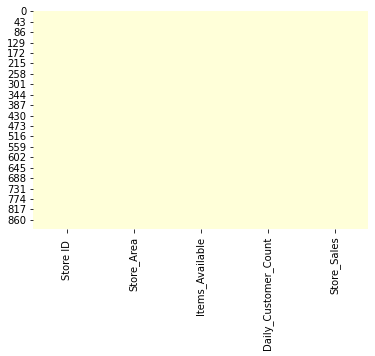

In [7]:
# Valores nulos ou espaços vazios
sns.heatmap(data.isnull(), cmap = 'YlGnBu', cbar = False)
print(data.isnull().sum())

                      Store ID   Store_Area  Items_Available  \
Store ID               1.000000   -0.058705        -0.055707   
Store_Area            -0.058705    1.000000         0.998891   
Items_Available       -0.055707    0.998891         1.000000   
Daily_Customer_Count  -0.010029   -0.041423        -0.040978   
Store_Sales            0.071486    0.097474         0.098849   

                      Daily_Customer_Count  Store_Sales  
Store ID                         -0.010029     0.071486  
Store_Area                       -0.041423     0.097474  
Items_Available                  -0.040978     0.098849  
Daily_Customer_Count              1.000000     0.008629  
Store_Sales                       0.008629     1.000000  


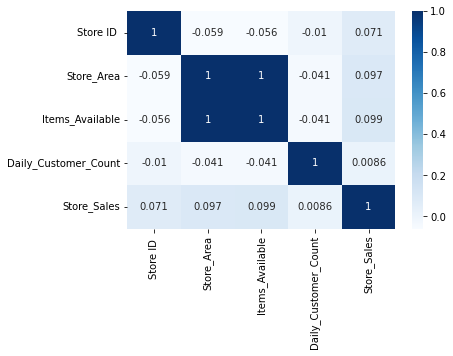

In [8]:
# Correlação entre as colunas
sns.heatmap(data.corr(), annot= True, cmap= 'Blues')
print(data.corr())

In [9]:
data.drop(['Store ID '], axis= 1)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


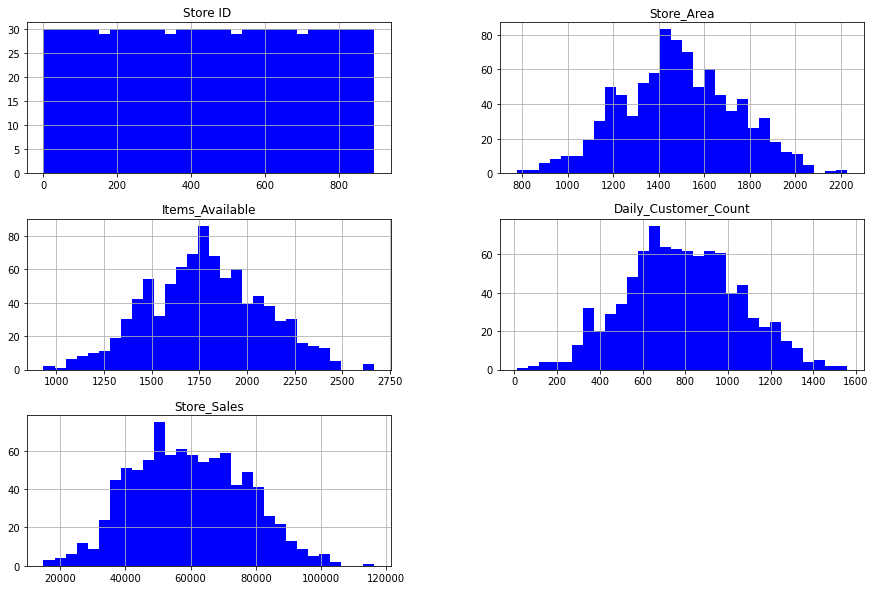

In [10]:
# Analise da distribuição de cada colunas
data.hist(bins = 30, figsize=(15,10), color = 'b');

A cima podemos identificar que nosso dataset possui alguns outliers, então foi feita uma analise melhor deste outliers e feita a retirada de alguns

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_Area'>

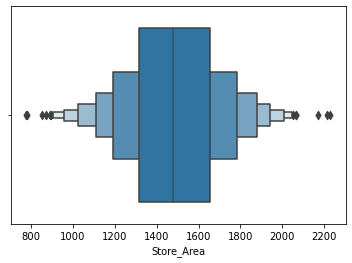

In [11]:
sns.boxenplot(data.Store_Area)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_Sales'>

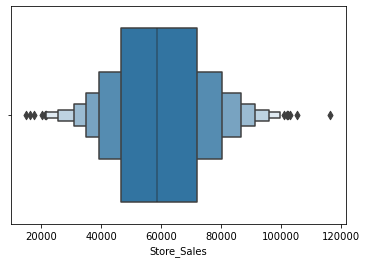

In [12]:
sns.boxenplot(data.Store_Sales)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Items_Available'>

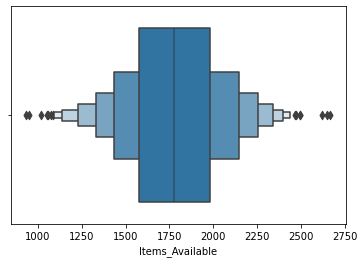

In [13]:
sns.boxenplot(data.Items_Available)

In [14]:
#tirando outilines altos
lista_drop = []

lista_drop.append(list(data[data['Store_Area'] > 1850].index)) 

lista_drop.append(list(data[data['Store_Sales'] > 100000].index)) 

lista_drop.append(list(data[data['Items_Available'] > 2200].index))

lista_drop = set(sum(lista_drop, []))
lista_drop = list(lista_drop) 

data.drop(lista_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              806 non-null    int64
 1   Store_Area            806 non-null    int64
 2   Items_Available       806 non-null    int64
 3   Daily_Customer_Count  806 non-null    int64
 4   Store_Sales           806 non-null    int64
dtypes: int64(5)
memory usage: 37.8 KB


In [15]:
#tirando outlines baixo

#tirando outilines altos
lista_drop_b = []

lista_drop_b.append(list(data[data['Store_Area'] < 1000].index)) 

lista_drop_b.append(list(data[data['Store_Sales'] < 25000].index)) 

lista_drop_b.append(list(data[data['Items_Available'] < 1200].index))

lista_drop_b = set(sum(lista_drop_b, []))
lista_drop_b = list(lista_drop_b) 

data.drop(lista_drop_b, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              771 non-null    int64
 1   Store_Area            771 non-null    int64
 2   Items_Available       771 non-null    int64
 3   Daily_Customer_Count  771 non-null    int64
 4   Store_Sales           771 non-null    int64
dtypes: int64(5)
memory usage: 36.1 KB


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Items_Available'>

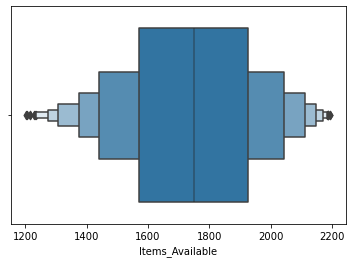

In [16]:
sns.boxenplot(data.Items_Available)

 Aqui foi criado mais duas colunas, `store_size` e `store_profit`, assim é possivel indentificar melhor alguns certos perfis de lojas.

In [17]:
#Divisão do tamnanho das lojas
division_store_size = [800, 1150, 1500, 1850]

store_size = pd.cut(data.Store_Area, bins = division_store_size, right = False)
category_group_store = ['Peq', 'Med', 'Gran']
group_store = pd.cut(data.Store_Area, bins = division_store_size,  labels = category_group_store)
data['store_size']= group_store

In [18]:
#Divisão da loja por retabilidade
division_store_profit = [ 20000, 45000, 70000, 95000, 110320]

store_profit = pd.cut(data.Store_Sales, bins = division_store_profit, right = False)
category_group_profit = ['Low', 'Med', 'High', 'Super_High']
group_store = pd.cut(data.Store_Sales, bins = division_store_profit,  labels = category_group_profit)
data['store_profit'] =    group_store     
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'store_size', 'store_profit'],
      dtype='object')

In [19]:
df_feat = data[['Items_Available',
                'Store_Sales',
                'Store_Area',
                'Daily_Customer_Count'
               ]]
df_feat.head()

,Items_Available,Store_Sales,Store_Area,Daily_Customer_Count
0,1961,66490,1659,530
1,1752,39820,1461,210
2,1609,54010,1340,720
3,1748,53730,1451,620
4,2111,46620,1770,450


<AxesSubplot:>

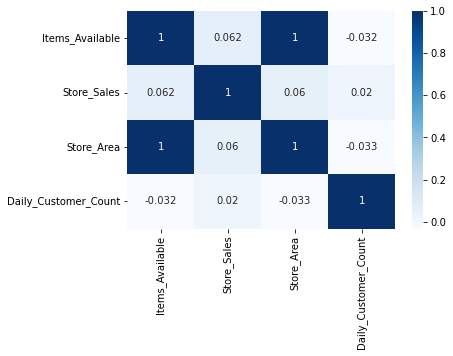

In [20]:
sns.heatmap(df_feat.corr(), annot= True, cmap= 'Blues')

# A parti daqui podemos começar a preparar os dados e fazer teste com alguns modelo de regressão 

In [21]:
df = pd.get_dummies(df_feat, drop_first = True)
df.columns

Index(['Items_Available', 'Store_Sales', 'Store_Area', 'Daily_Customer_Count'], dtype='object')

<AxesSubplot:>

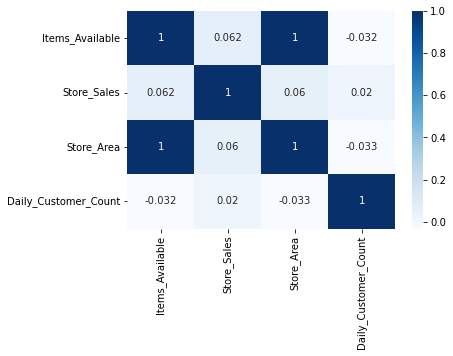

In [22]:
sns.heatmap(df.corr(), annot= True, cmap= 'Blues')

In [23]:
# Criando conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X = df.drop('Store_Sales', axis=1)
y = df['Store_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 127, train_size= 0.30, test_size= 0.70)



In [24]:
#padroniza~ção dos dados
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.fit_transform(X_test)

# Modelo 1
# LinearRegression

In [25]:
#Regressão linear Simples
from sklearn.linear_model import LinearRegression
mode_l = LinearRegression(fit_intercept = True)
fit_1 = mode_l.fit(X_train, y_train)

ypred_mode_1 = mode_l.predict(X_test)



In [26]:
print ('MAE:', mean_absolute_error(y_test, ypred_mode_1).round(2))
print ('MSE:', mean_squared_error(y_test, ypred_mode_1).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_mode_1)).round(2))
print ('mape' , mean_absolute_error(y_test, ypred_mode_1)*100)

MAE: 13730.25
MSE: 264843197.94
RMSE: 16274.0
mape 1373024.7551639269


<AxesSubplot:ylabel='Store_Sales'>

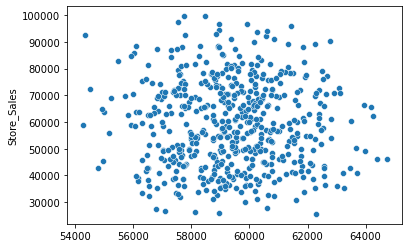

In [27]:
sns.scatterplot(y=y_test, x= ypred_mode_1)

# Modelo 2
# ElasticNet

In [28]:
from sklearn.linear_model import ElasticNet

alpha = 0.0001
mode_2 = ElasticNet(alpha=alpha) #, l1_ratio=0.7)
fit_2 = mode_2.fit(X_train, y_train)

ypred_mode_2 = mode_2.predict(X_test)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30064618007.2635, tolerance: 6076772.677229438
  model = cd_fast.enet_coordinate_descent(


In [29]:
print ('MAE:', mean_absolute_error(y_test, ypred_mode_2).round(2))
print ('MSE:', mean_squared_error(y_test, ypred_mode_2).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_mode_2)).round(2))
print ('mape' , mean_absolute_error(y_test, ypred_mode_2)*100)

MAE: 13726.13
MSE: 264687636.97
RMSE: 16269.22
mape 1372613.4858195824


<AxesSubplot:ylabel='Store_Sales'>

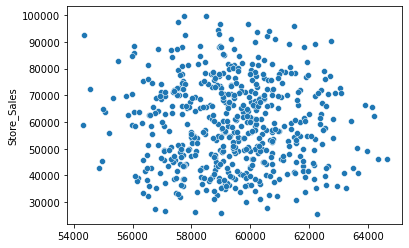

In [30]:
sns.scatterplot(y=y_test, x= ypred_mode_2)

# Modelo 3
# RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

mode_3 = RandomForestRegressor()
fit_3 = mode_3.fit(X_train,y_train)

ypred_mode_3 = mode_3.predict(X_test)

In [32]:
print ('MAE:', mean_absolute_error(y_test, ypred_mode_3).round(2))
print ('MSE:', mean_squared_error(y_test, ypred_mode_3).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_mode_3)).round(2))
print ('mape' , mean_absolute_error(y_test, ypred_mode_3)*100)

MAE: 14508.56
MSE: 311829316.14
RMSE: 17658.69
mape 1450855.87037037


<AxesSubplot:ylabel='Store_Sales'>

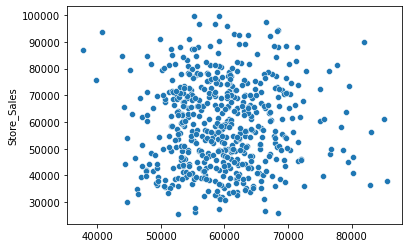

In [33]:
sns.scatterplot(y=y_test, x= ypred_mode_3)

# Modelo 4
# Ridge

In [34]:
from sklearn.linear_model import Ridge

alpha = 1.5
mode_4 = Ridge(alpha=alpha)
fit_4 = mode_4.fit(X_train, y_train)

ypred_mode_4 = mode_4.predict(X_test)


In [36]:
print ('MAE:', mean_absolute_error(y_test, ypred_mode_4).round(2))
print ('MSE:', mean_squared_error(y_test, ypred_mode_4).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_mode_4)).round(2))
print ('mape' , mean_absolute_error(y_test, ypred_mode_4)*100)

MAE: 13730.24
MSE: 264842858.5
RMSE: 16273.99
mape 1373023.8483259962


<AxesSubplot:ylabel='Store_Sales'>

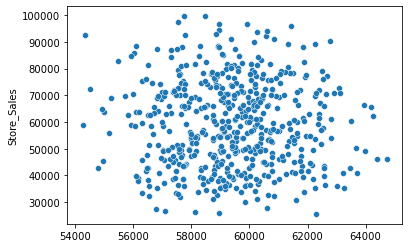

In [37]:
sns.scatterplot(y=y_test, x=ypred_mode_4)

# Modelo 5
# XGBRegressor

In [38]:
pip install xgboost

In [39]:
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred_5 = model.predict(X_test)

y_pred_5 = model.predict(X_test)

In [41]:
print ('MAE:', mean_absolute_error(y_test, y_pred_5).round(2))
print ('MSE:', mean_squared_error(y_test, y_pred_5).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_5)).round(2))
print ('mape' , mean_absolute_error(y_test, y_pred_5)*100)

MAE: 15791.6
MSE: 374645237.62
RMSE: 19355.75
mape 1579160.2763310187


<AxesSubplot:ylabel='Store_Sales'>

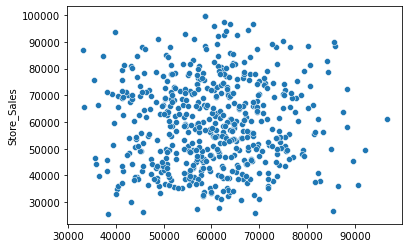

In [42]:
sns.scatterplot(y=y_test, x=y_pred_5)

# Conclusão

* Todos os modelos tiveram uma performace parecida, como podemos ver pelas metricas aplicadas em cada modelo.
* Com toda a analise podemos ver que todas variaveis apresentadas se correlacionam bastante entre si.